# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1. Open the categoricals variable we created before.

``` python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```


In [4]:
categoricals = data.select_dtypes(np.object)
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


## 2. Plot all the categorical variables with the proper plot. What can you see?

The column "Location Code" and the column "Matrial Status" have very similar distributions. 
Most of the costumers are Suburban and Married. Only a few customers are Urban and Divorced. 

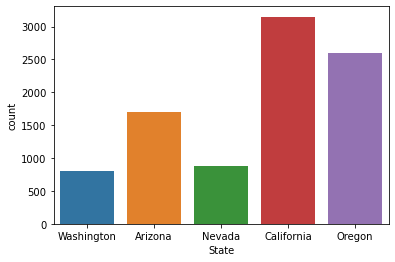

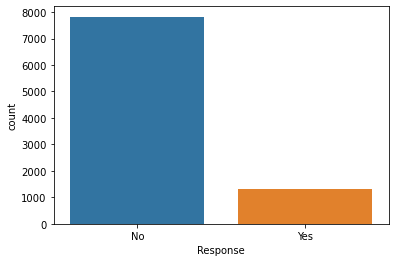

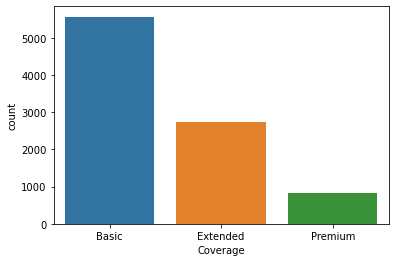

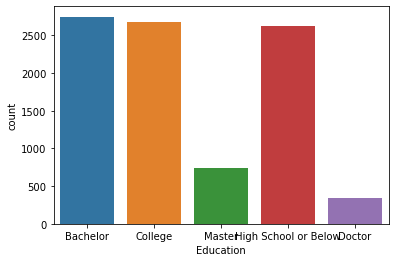

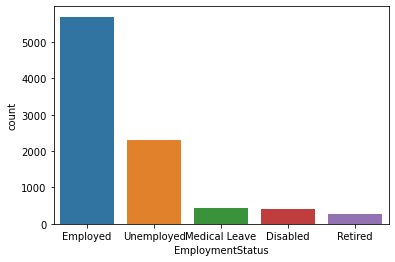

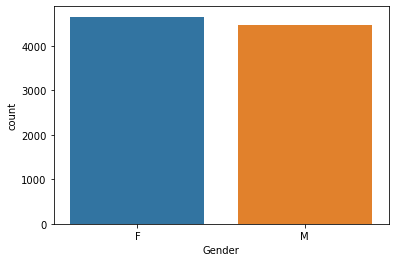

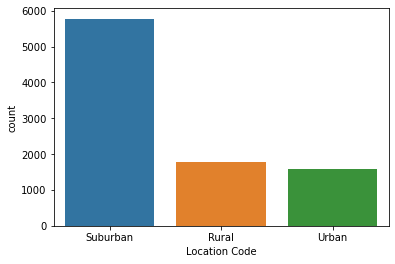

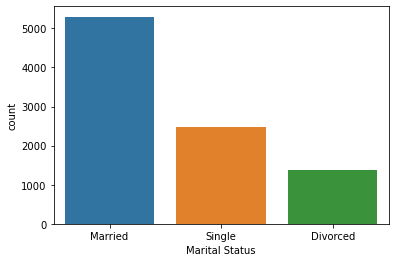

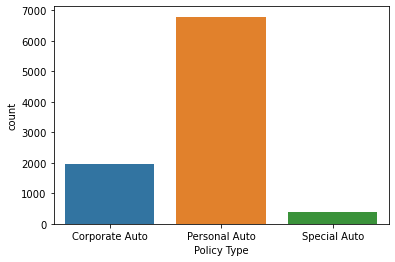

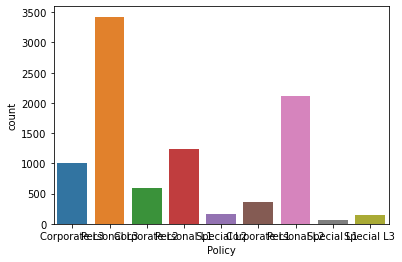

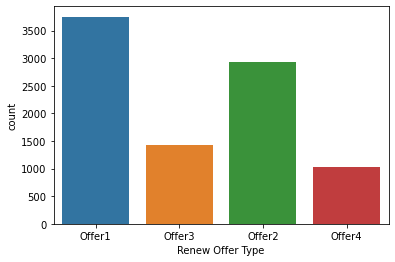

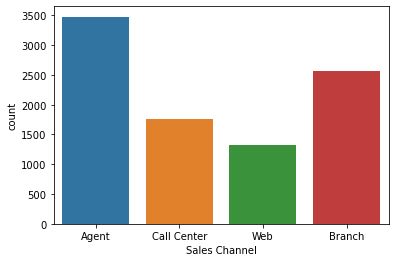

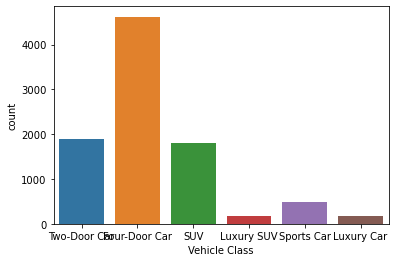

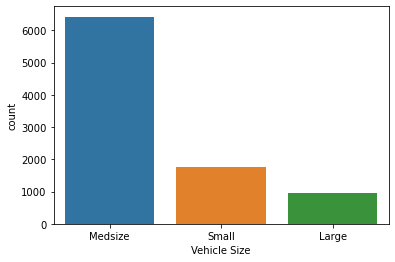

In [19]:
categoricals1 = categoricals.drop(['Customer', 'Effective To Date'], axis=1)

for column in categoricals1.columns: 
    sns.countplot(categoricals[column])
    plt.show()

## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [14]:
data['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

I think in the columns Policy and Vehicle Class are information that could be summarized without loss of information. So i decided to summarize the values with the at least counts. 

In [15]:
data['Policy'] = data['Policy'].apply(lambda x: x if x in ['Corporate L1', 'Personal L1', 'Personal L2', 'Personal L3'] else 'O')

data['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
O               1987
Personal L1     1240
Corporate L1     359
Name: Policy, dtype: int64

In [17]:
data['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [18]:
data['Vehicle Class'] = data['Vehicle Class'].apply(lambda x: x if x in ['Four-Door Car', 'Two-Door Car', 'SUV'] else 'O')

data['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
O                 831
Name: Vehicle Class, dtype: int64

In [22]:
nulls = pd.DataFrame(categoricals.isna().sum()*100/len(categoricals), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
Customer,0.0
State,0.0
Response,0.0
Coverage,0.0
Education,0.0
Effective To Date,0.0
EmploymentStatus,0.0
Gender,0.0
Location Code,0.0
Marital Status,0.0


## 4. Plot time variable. Can you extract something from it?

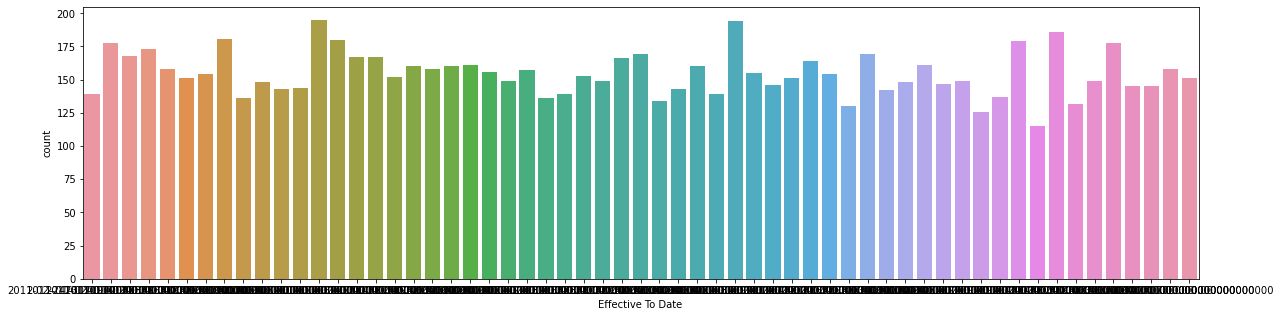

In [31]:
plt.figure(figsize = (20, 5))
sns.countplot(categoricals['Effective To Date'])
plt.show()

In [24]:
categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'])
categoricals['Effective To Date_Year'] = categoricals['Effective To Date'].dt.strftime('%Y')

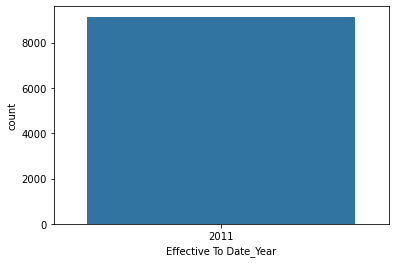

In [25]:
sns.countplot(categoricals['Effective To Date_Year'])
plt.show()

In [26]:
categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'])
categoricals['Effective To Date_Month'] = categoricals['Effective To Date'].dt.strftime('%m')

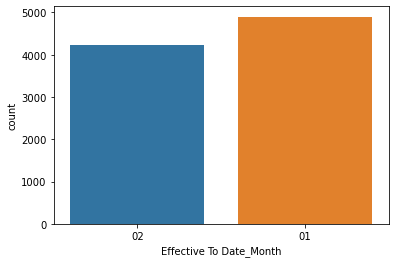

In [27]:
sns.countplot(categoricals['Effective To Date_Month'])
plt.show()

In [28]:
categoricals['Effective To Date'] = pd.to_datetime(categoricals['Effective To Date'])
categoricals['Effective To Date_Day'] = categoricals['Effective To Date'].dt.strftime('%d')

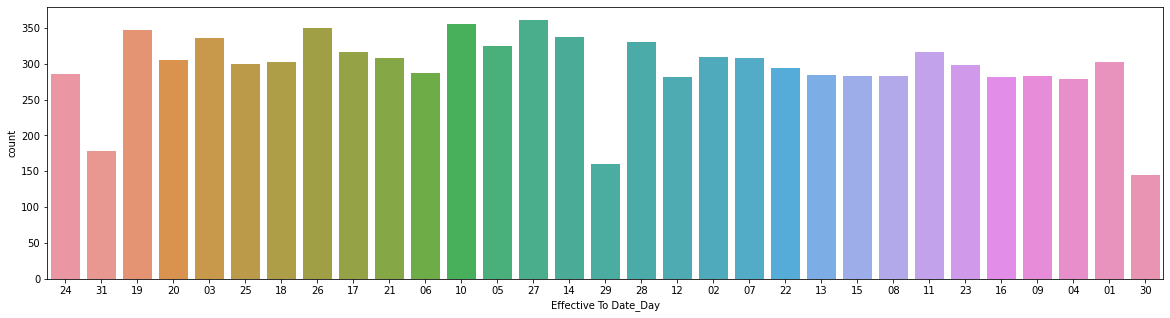

In [30]:
plt.figure(figsize = (20, 5))
sns.countplot(categoricals['Effective To Date_Day'])
plt.show()

I can extract that there is no variance when we look at the year from this column. Also the month give us not that much infotmation (Jan or Feb). Only the days gives variance. That last three days of the month (29, 30, 31) 
are the days with the fewest "Effective to date" Deals. 